In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weatherAUS_data = pd.read_csv('C:/Users/Gangesh/Desktop/weatherAUS.csv')

data = weatherAUS_data.copy()
data.shape

(145460, 23)

In [3]:
data.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28,32.3
Rainfall,0.6,0,0,0,1
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44,44,46,24,41
WindDir9am,W,NNW,W,SE,ENE


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

In [4]:
# Unique values in categorical variables
cat_col = data.select_dtypes(include=['object'])
cat_col.nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

In [5]:
data['Location'].value_counts()

Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Brisbane            3193
Melbourne           3193
Perth               3193
Hobart              3193
Albany              3040
Cairns              3040
MountGinini         3040
Albury              3040
Ballarat            3040
Launceston          3040
Wollongong          3040
GoldCoast           3040
MountGambier        3040
Bendigo             3040
AliceSprings        3040
Townsville          3040
Tuggeranong         3039
Newcastle           3039
Penrith             3039
Moree               3009
Williamtown         3009
Portland            3009
CoffsHarbour        3009
BadgerysCreek       3009
Dartmoor            3009
Woomera             3009
PerthAirport        3009
Watsonia            3009
Sale                3009
PearceRAAF          3009
SydneyAirport       3009
WaggaWagga          3009
MelbourneAirport    3009
Cobar               3009
Mildura             3009
Nuriootpa           3009


In [6]:
cat_col.isna().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [7]:

#temp_data = data.dropna(subset = ['RainTomorrow'])
#sns.pairplot(temp_data,hue='RainTomorrow')

In [8]:
# Breaking down date column to Year, Month and Date

data['Date'] = pd.to_datetime(data['Date']) # parse as datatime

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data[['Date', 'Year', 'Month', 'Day']] # preview changes made

data.drop('Date', axis=1, inplace = True) # removing date object
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null object
RainTomorrow     142193 non-null obje

In [9]:
print(data['Location'].value_counts())
print("")
print(f"Missing Values: {data['Location'].isna().sum()}")

Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Brisbane            3193
Melbourne           3193
Perth               3193
Hobart              3193
Albany              3040
Cairns              3040
MountGinini         3040
Albury              3040
Ballarat            3040
Launceston          3040
Wollongong          3040
GoldCoast           3040
MountGambier        3040
Bendigo             3040
AliceSprings        3040
Townsville          3040
Tuggeranong         3039
Newcastle           3039
Penrith             3039
Moree               3009
Williamtown         3009
Portland            3009
CoffsHarbour        3009
BadgerysCreek       3009
Dartmoor            3009
Woomera             3009
PerthAirport        3009
Watsonia            3009
Sale                3009
PearceRAAF          3009
SydneyAirport       3009
WaggaWagga          3009
MelbourneAirport    3009
Cobar               3009
Mildura             3009
Nuriootpa           3009


In [10]:
# One Hot Encoding (Preview) for Location column
pd.get_dummies(data.Location, drop_first=True).head() # 'drop first' means that we drop the first value if everything else is 0

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Unique Values
print(data['WindGustDir'].value_counts())
print("")
print(f"Missing Values: {data['WindGustDir'].isna().sum()}")

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

Missing Values: 10326


In [12]:
# One-Hot Encoding (Preview) of 'WindGustDir'

pd.get_dummies(data.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [13]:
# Unique Values
print(data['WindDir9am'].value_counts())
print("")
print(f"Missing Values: {data['WindDir9am'].isna().sum()}")

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

Missing Values: 10566


In [14]:
# One Hot Encoding (Preview) for WindDir9am column

pd.get_dummies(data.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# Unique Values
print(data['WindDir3pm'].value_counts())
print("")
print(f"Missing Values: {data['WindDir3pm'].isna().sum()}")

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

Missing Values: 4228


In [16]:
# One Hot Encoding (Preview) for WindDir3pm column

pd.get_dummies(data.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [17]:
print(data['RainToday'].value_counts())
print("")
print(f"Missing Values: {data['RainToday'].isna().sum()}")

No     110319
Yes     31880
Name: RainToday, dtype: int64

Missing Values: 3261


In [18]:
pd.get_dummies(data.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [19]:
var_data = data.select_dtypes(include=['float64'])
var_data.isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [20]:
# Continuous variables

var_data = data.select_dtypes(include=['float64'])
var_data.describe().apply(round) # round the data to first decimal place

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.0,144199.0,142199.0,82670.0,75625.0,135197.0,143693.0,142398.0,142806.0,140953.0,130395.0,130432.0,89572.0,86102.0,143693.0,141851.0
mean,12.0,23.0,2.0,5.0,8.0,40.0,14.0,19.0,69.0,52.0,1018.0,1015.0,4.0,5.0,17.0,22.0
std,6.0,7.0,8.0,4.0,4.0,14.0,9.0,9.0,19.0,21.0,7.0,7.0,3.0,3.0,6.0,7.0
min,-8.0,-5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.0,977.0,0.0,0.0,-7.0,-5.0
25%,8.0,18.0,0.0,3.0,5.0,31.0,7.0,13.0,57.0,37.0,1013.0,1010.0,1.0,2.0,12.0,17.0
50%,12.0,23.0,0.0,5.0,8.0,39.0,13.0,19.0,70.0,52.0,1018.0,1015.0,5.0,5.0,17.0,21.0
75%,17.0,28.0,1.0,7.0,11.0,48.0,19.0,24.0,83.0,66.0,1022.0,1020.0,7.0,7.0,22.0,26.0
max,34.0,48.0,371.0,145.0,14.0,135.0,130.0,87.0,100.0,100.0,1041.0,1040.0,9.0,9.0,40.0,47.0


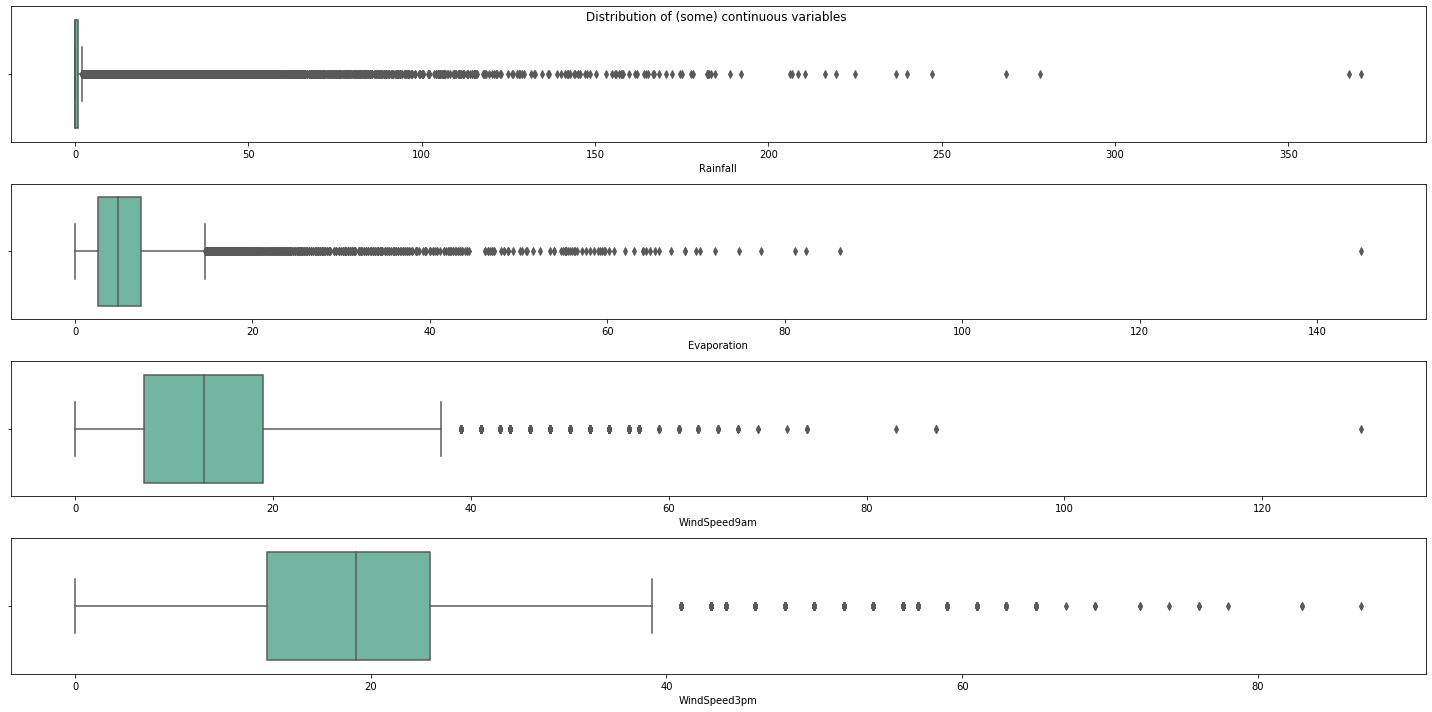

In [22]:
fig, axes = plt.subplots(4,1, figsize=(20, 10), sharey=False)
fig.suptitle('Distribution of (some) continuous variables')

# Rainfall
sns.boxplot(x= 'Rainfall', data = data, palette = 'Set2', ax = axes[0])
axes[0].set_title("")

# Evaporation
sns.boxplot(x= 'Evaporation', data = data, palette = 'Set2', ax = axes[1])
axes[1].set_title("")

# Windspeed (9AM)
sns.boxplot(x= 'WindSpeed9am', data = data, palette = 'Set2', ax = axes[2])
axes[2].set_title("")

# Windspeed (3PM)
sns.boxplot(x= 'WindSpeed3pm', data = data, palette = 'Set2', ax = axes[3])
axes[3].set_title("")

plt.tight_layout()

In [23]:
#fig, axes = plt.subplots(4,1, figsize=(10, 10), sharey=False)
#fig.suptitle('Distribution of (some) continuous variables')

# Rainfall
#sns.distplot(data, label= 'Rainfall', hist = True, ax = axes[0], bins = 10)
#axes[0].set_title("")

# Evaporation
#sns.distplot(data, label= 'Evaporation', hist = True, ax = axes[1], bins = 10)
#axes[1].set_title("")

# Windspeed (9AM)
#sns.distplot(data, label= 'WindSpeed9am', hist = True, ax = axes[2], bins = 10)
#axes[2].set_title("")

# Windspeed (3PM)
#sns.distplot(data, label= 'WindSpeed3pm', hist = True, ax = axes[3], bins = 10)
#axes[3].set_title("")

#plt.tight_layout()

In [23]:
# Calculating IQR, Upper and Lower bounds for all four columns

for column in ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']:
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    Lower_fence = data[column].quantile(0.25) - (IQR * 3)
    Upper_fence = data[column].quantile(0.75) + (IQR * 3)
    print(f'{column} outliers are values < {round(Lower_fence,2)} or > {round(Upper_fence,2)}')

Rainfall outliers are values < -2.4 or > 3.2
Evaporation outliers are values < -11.8 or > 21.8
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


In [24]:
print(f"Number of missing values in response variable: {data['RainTomorrow'].isna().sum()}")

data = data.dropna(subset = ['RainTomorrow'])

print(f"Number of missing values in response variable after dropping NA values: {data['RainTomorrow'].isna().sum()}")

Number of missing values in response variable: 3267
Number of missing values in response variable after dropping NA values: 0


In [25]:
from sklearn.model_selection import train_test_split

X = data.drop(['RainTomorrow'], axis = 1)
y = data['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(f"The training sets have the following shapes: {X_train.shape, y_train.shape}")
print(f"The testing sets have the following shapes: {X_test.shape, y_test.shape}")

The training sets have the following shapes: ((113754, 24), (113754,))
The testing sets have the following shapes: ((28439, 24), (28439,))


In [26]:
# Listing out categorical columns and their missing values
# This doesn't include 'Year', 'Month', and 'Day' because they're integers

categorical_cols = list(X_train.select_dtypes(include=['object']).columns)
X_train[categorical_cols].isna().sum()

#y_test

Location          0
WindGustDir    7407
WindDir9am     7978
WindDir3pm     3008
RainToday      1139
dtype: int64

In [27]:
# Filling in missing values in X_train with the mode.
for i in categorical_cols:
    X_train[i].fillna(X_train[i].mode()[0], inplace=True)
    X_test[i].fillna(X_test[i].mode()[0], inplace=True)
    
# Checking missing values in X_train
X_train[categorical_cols].isna().sum()

C:\Users\Gangesh\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [28]:
# Checking missing values in X_test
X_test[categorical_cols].isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [29]:
# Encoding categorical variables
import category_encoders as ce


onehotencoder = ce.BinaryEncoder(cols=['RainToday'])
X_train = onehotencoder.fit_transform(X_train)
X_test = onehotencoder.fit_transform(X_test)

X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
113462,Witchcliffe,13.9,22.6,0.2,NaN,NaN,S,41.0,SSE,S,...,1013.4,NaN,NaN,18.8,20.4,0,1,2014,4,25
89638,Cairns,22.4,29.4,2.0,6.0,6.3,ENE,33.0,SSE,SE,...,1013.1,7.0,5.0,26.4,27.5,1,0,2015,11,2
138130,AliceSprings,9.7,36.2,0.0,11.4,12.3,E,31.0,NE,N,...,1013.6,1.0,1.0,28.5,35.0,0,1,2014,10,19
87898,Cairns,20.5,30.1,0.0,8.8,11.1,ESE,37.0,SSE,E,...,1010.8,2.0,3.0,27.3,29.4,0,1,2010,10,30
16484,Newcastle,16.8,29.2,0.0,NaN,NaN,W,NaN,N,SE,...,NaN,5.0,8.0,22.2,27.0,0,1,2012,11,8


In [30]:
continuous_cols = list(X_train.select_dtypes(include=['float64']).columns)
X_train[continuous_cols].isna().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
dtype: int64

In [31]:
# Fill in missing values with median

for column in continuous_cols:
    X_train[column].fillna(X_train[column].median(), inplace = True)
    X_test[column].fillna(X_test[column].median(), inplace = True)
    
# Checking missing values 
X_train.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday_0      0
RainToday_1      0
Year             0
Month            0
Day              0
dtype: int64

In [32]:
# Checking missing values 
X_test.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday_0      0
RainToday_1      0
Year             0
Month            0
Day              0
dtype: int64

In [36]:
 #Removing outliers in certain continous columns
def upper_outlier(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])
def lower_outlier(df, variable, bot):
    return np.where(df[variable]<bot, bot, df[variable])

for X_df in [X_train, X_test]:
    X_df['Rainfall'] = upper_outlier(X_df, 'Rainfall', 3.2)
    X_df['Rainfall'] = lower_outlier(X_df, 'Rainfall', -2.4)
    
    X_df['Evaporation'] = upper_outlier(X_df, 'Evaporation', 21.8)
    X_df['Evaporation'] = lower_outlier(X_df, 'Evaporation', -11.8)

    X_df['WindSpeed9am'] = upper_outlier(X_df, 'WindSpeed9am', 55.0)
    X_df['WindSpeed9am'] = lower_outlier(X_df, 'WindSpeed9am', -29.0)

    X_df['WindSpeed3pm'] = upper_outlier(X_df, 'WindSpeed3pm', 57.0)
    X_df['WindSpeed3pm'] = lower_outlier(X_df, 'WindSpeed3pm', -20.0)

X_train.describe().apply(round)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
count,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,...,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0
mean,12.0,23.0,1.0,5.0,8.0,40.0,14.0,19.0,69.0,52.0,...,1015.0,5.0,5.0,17.0,22.0,0.0,1.0,2013.0,6.0,16.0
std,6.0,7.0,1.0,3.0,3.0,13.0,9.0,9.0,19.0,21.0,...,7.0,2.0,2.0,6.0,7.0,0.0,0.0,3.0,3.0,9.0
min,-8.0,-5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,977.0,0.0,0.0,-7.0,-5.0,0.0,0.0,2007.0,1.0,1.0
25%,8.0,18.0,0.0,4.0,8.0,31.0,7.0,13.0,57.0,37.0,...,1011.0,3.0,4.0,12.0,17.0,0.0,1.0,2011.0,3.0,8.0
50%,12.0,23.0,0.0,5.0,8.0,39.0,13.0,19.0,70.0,52.0,...,1015.0,5.0,5.0,17.0,21.0,0.0,1.0,2013.0,6.0,16.0
75%,17.0,28.0,1.0,5.0,9.0,46.0,19.0,24.0,83.0,65.0,...,1019.0,6.0,6.0,22.0,26.0,0.0,1.0,2015.0,9.0,23.0
max,34.0,48.0,3.0,22.0,14.0,135.0,55.0,57.0,100.0,100.0,...,1040.0,9.0,8.0,40.0,47.0,1.0,1.0,2017.0,12.0,31.0


In [44]:
X_train.describe().apply(round)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
count,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,...,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0
mean,12.0,23.0,2.0,5.0,8.0,40.0,14.0,19.0,69.0,52.0,...,1015.0,5.0,5.0,17.0,22.0,0.0,1.0,2013.0,6.0,16.0
std,6.0,7.0,8.0,3.0,3.0,13.0,9.0,9.0,19.0,21.0,...,7.0,2.0,2.0,6.0,7.0,0.0,0.0,3.0,3.0,9.0
min,-8.0,-5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,977.0,0.0,0.0,-7.0,-5.0,0.0,0.0,2007.0,1.0,1.0
25%,8.0,18.0,0.0,4.0,8.0,31.0,7.0,13.0,57.0,37.0,...,1011.0,3.0,4.0,12.0,17.0,0.0,1.0,2011.0,3.0,8.0
50%,12.0,23.0,0.0,5.0,8.0,39.0,13.0,19.0,70.0,52.0,...,1015.0,5.0,5.0,17.0,21.0,0.0,1.0,2013.0,6.0,16.0
75%,17.0,28.0,1.0,5.0,9.0,46.0,19.0,24.0,83.0,65.0,...,1019.0,6.0,6.0,22.0,26.0,0.0,1.0,2015.0,9.0,23.0
max,34.0,48.0,371.0,86.0,14.0,135.0,130.0,83.0,100.0,100.0,...,1040.0,9.0,8.0,40.0,47.0,1.0,1.0,2017.0,12.0,31.0


X_train = X_train[X_train['Rainfall'] <= 3.2] 
X_train = X_train[X_train['Evaporation'] <= 22] 
X_train = X_train[X_train['WindSpeed9am'] <= 55] 
X_train = X_train[X_train['WindSpeed3pm'] <= 57] 

In [40]:
X_train.shape

(96962, 25)

X_test = X_train[X_train['Rainfall'] <= 3.2] 
X_test = X_train[X_train['Evaporation'] <= 22] 
X_test = X_train[X_train['WindSpeed9am'] <= 55] 
X_test = X_train[X_train['WindSpeed3pm'] <= 57] 

In [42]:
# Include the other columns that are to be encoded (outlined above)

X_train = pd.concat([X_train[continuous_cols], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir, prefix = 'WGD'),
                     pd.get_dummies(X_train.WindDir9am, prefix = 'WD9am'),
                     pd.get_dummies(X_train.WindDir3pm, prefix = 'WD3pm')], axis=1)

X_test = pd.concat([X_test[continuous_cols], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir, prefix = 'WGD'),
                     pd.get_dummies(X_test.WindDir9am, prefix = 'WD9am'),
                     pd.get_dummies(X_test.WindDir3pm, prefix = 'WD3pm')], axis=1)

In [43]:
y_test.isna().sum()

0

In [44]:
y_train.isna().sum()

0

In [45]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WD3pm_NNW,WD3pm_NW,WD3pm_S,WD3pm_SE,WD3pm_SSE,WD3pm_SSW,WD3pm_SW,WD3pm_W,WD3pm_WNW,WD3pm_WSW
count,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,...,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000
mean,11.973235,23.680888,0.251055,5.222878,8.261308,39.015810,13.581486,18.337173,66.664869,48.886141,...,0.056692,0.060044,0.064675,0.100947,0.062891,0.052495,0.061993,0.065861,0.058477,0.062148
std,6.432700,7.065527,0.621167,2.701512,2.652202,12.572094,8.555727,8.487180,18.755430,19.759005,...,0.231255,0.237570,0.245952,0.301260,0.242767,0.223024,0.241145,0.248040,0.234644,0.241426
min,-8.200000,-3.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.300000,18.400000,0.000000,4.400000,8.500000,31.000000,7.000000,13.000000,55.000000,35.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.800000,23.100000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,68.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.600000,28.700000,0.000000,5.600000,9.200000,46.000000,19.000000,24.000000,80.000000,62.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,47.300000,3.200000,22.000000,14.500000,135.000000,54.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
# Scaling using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

cols = list(X_train.columns)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=[cols])

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WD3pm_NNW,WD3pm_NW,WD3pm_S,WD3pm_SE,WD3pm_SSE,WD3pm_SSW,WD3pm_SW,WD3pm_W,WD3pm_WNW,WD3pm_WSW
count,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,...,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000,96962.000000
mean,0.479174,0.531367,0.078455,0.237404,0.569745,0.255937,0.251509,0.321705,0.666649,0.488861,...,0.056692,0.060044,0.064675,0.100947,0.062891,0.052495,0.061993,0.065861,0.058477,0.062148
std,0.152796,0.140189,0.194115,0.122796,0.182910,0.097458,0.158439,0.148898,0.187554,0.197590,...,0.231255,0.237570,0.245952,0.301260,0.242767,0.223024,0.241145,0.248040,0.234644,0.241426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.368171,0.426587,0.000000,0.200000,0.586207,0.193798,0.129630,0.228070,0.550000,0.350000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.475059,0.519841,0.000000,0.218182,0.586207,0.255814,0.240741,0.333333,0.680000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.589074,0.630952,0.000000,0.254545,0.634483,0.310078,0.351852,0.421053,0.800000,0.620000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WD3pm_NNW,WD3pm_NW,WD3pm_S,WD3pm_SE,WD3pm_SSE,WD3pm_SSW,WD3pm_SW,WD3pm_W,WD3pm_WNW,WD3pm_WSW
0,0.524941,0.509921,0.0625,0.218182,0.586207,0.271318,0.370370,0.491228,0.65,0.55,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.726841,0.644841,0.6250,0.272727,0.434483,0.209302,0.129630,0.333333,0.71,0.59,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.425178,0.779762,0.0000,0.518182,0.848276,0.193798,0.277778,0.192982,0.06,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.681710,0.658730,0.0000,0.400000,0.765517,0.240310,0.407407,0.333333,0.59,0.53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.593824,0.640873,0.0000,0.218182,0.586207,0.255814,0.000000,0.122807,0.72,0.53,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96957,0.418052,0.410714,0.0000,0.218182,0.586207,0.224806,0.129630,0.298246,0.62,0.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96958,0.223278,0.462302,0.0000,0.090909,0.855172,0.209302,0.240741,0.228070,0.69,0.33,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96959,0.477435,0.410714,0.3750,0.090909,0.586207,0.255814,0.240741,0.350877,0.67,0.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
96960,0.377672,0.577381,0.0000,0.472727,0.772414,0.193798,0.203704,0.228070,0.58,0.25,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
y_train

yy_train = []
yy_test = []
for x in y_train:
    if(x == "No"):
        yy_train.append(-1)
    else:
        yy_train.append(1)
        
for x in y_test:
    if(x == "No"):
        yy_test.append(-1)
    else:
        yy_test.append(1)
        
len(yy_train)
#yy

113754

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initiatlize the model
logreg = LogisticRegression(solver='liblinear', random_state = 0)

# Fit the model
logreg.fit(X_train, y_train)

# Predict data points 
y_pred_test = logreg.predict(X_test)

# Print accuracy scores
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')

ValueError: Found input variables with inconsistent numbers of samples: [96962, 113754]

y_pred_test

In [52]:
# Additional Metrics

print(f'Training set score: {round(logreg.score(X_train, y_train) * 100, 2)}%')
print(f'Test set score: {round(logreg.score(X_test, y_test) * 100, 2)}%')

# Calculating null accuracy
null_accuracy = (y_test.value_counts()[0]/(y_test.value_counts()[0]+y_test.value_counts()[1]))
print(f'Null Accuracy score: {round(null_accuracy * 100, 2)}%')

Training set score: 84.63%
Test set score: 84.84%
Null Accuracy score: 77.59%


In [53]:
# Initiatlize the model with C=100
logreg_c100 = LogisticRegression(C=100, solver='liblinear', random_state = 0)

# Fit the model
logreg_c100.fit(X_train, y_train)

print(f'Training set score: {round(logreg_c100.score(X_train, y_train) * 100, 2)}%')
print(f'Test set score: {round(logreg_c100.score(X_test, y_test) * 100, 2)}%')

Training set score: 84.67%
Test set score: 84.89%


In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22067
         Yes       0.74      0.51      0.60      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439



In [ ]:
#from sklearn import svm
#Create a svm Classifier
#clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
#clf.fit(X_train, y_train)

#Predict the response for test dataset
#y_pred = clf.predict(X_test)
# Print accuracy scores
#print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred) * 100, 2)}%')

In [ ]:
#y_pred

In [ ]:
X_test.shape